In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


pandas / numpy -> data handling

seaborn / matplotlib -> visualization (EDA)

LinearRegression -> model building

metrics -> model evaluation

In [2]:
#Load dataset 
df = pd.read_csv("ToyotaCorolla - MLR.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


**Exploratory Data Analysis (EDA)**

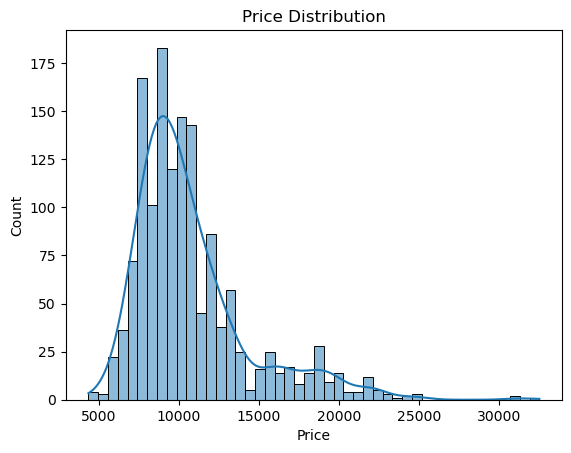

In [3]:
#Price Distribution
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()


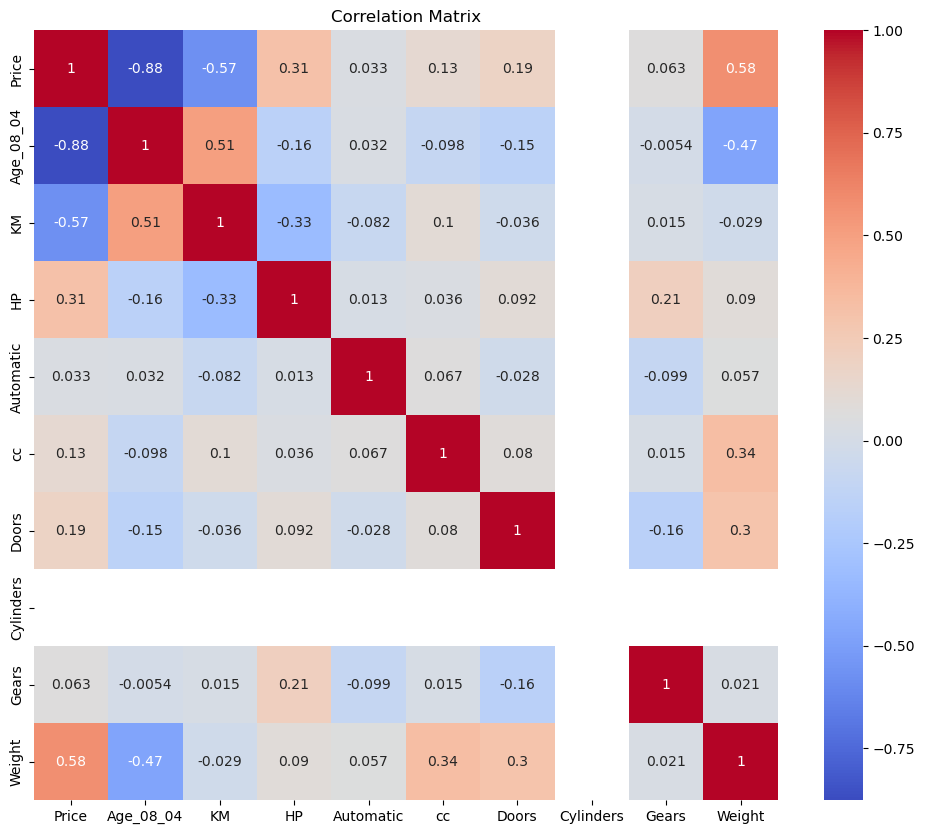

In [4]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Data Preprocessing**

In [5]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


In [6]:
#Split Features and Target
X = df.drop('Price', axis=1)
y = df['Price']


In [7]:
#Train-Test Split (80% – 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**MODEL 1: Using ALL Independent Variables**

In [12]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print("Model 1 R² Score:", r2_score(y_test, y_pred1))


Model 1 R² Score: 0.8348888040611084


In [9]:
print("Model 1 Performance")
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R2 Score:", r2_score(y_test, y_pred1))


Model 1 Performance
MAE: 990.8872739193923
MSE: 2203043.823143699
RMSE: 1484.2654153296503
R2 Score: 0.8348888040611084


**Interpretation**

Uses all available features

High R² but may suffer from multicollinearity

**MODEL 2: High Correlation Variables (From EDA)**

In [13]:
#Selected features
high_corr_features = [
    'Age_08_04',
    'KM',
    'HP',
    'Weight'
]

X2 = df[high_corr_features]
y2 = df['Price']



In [14]:
#Train-Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)


In [15]:
#Train Model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y_pred2 = model2.predict(X2_test)

print("Model 2 R² Score:", r2_score(y2_test, y_pred2))


Model 2 R² Score: 0.8506068681500583


In [24]:
y_pred2 = model2.predict(X2_test)

print("\nModel 2 Performance")
print("MAE:", mean_absolute_error(y2_test, y_pred2))
print("MSE:", mean_squared_error(y2_test, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred2)))
print("R2 Score:", r2_score(y2_test, y_pred2))



Model 2 Performance
MAE: 1001.2017466053621
MSE: 1993321.012973071
RMSE: 1411.85020911323
R2 Score: 0.8506068681500583


**Interpretation**

Uses EDA-based feature selection

Simpler and more interpretable

Avoids unnecessary variables

**MODEL 3: Alternative Feature Set**

In [18]:
alt_features = [
    'Age_08_04',
    'KM',
    'HP',
    'Automatic',
    'Weight'
]

X3 = df[alt_features]
y3 = df['Price']


In [19]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=42
)


In [20]:
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

y_pred3 = model3.predict(X3_test)

print("Model 3 R² Score:", r2_score(y3_test, y_pred3))


Model 3 R² Score: 0.8511893129923237


In [22]:
y_pred3 = model3.predict(X3_test)

print("\nModel 3 Performance")
print("MAE:", mean_absolute_error(y3_test, y_pred3))
print("MSE:", mean_squared_error(y3_test, y_pred3))
print("RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred3)))
print("R2 Score:", r2_score(y3_test, y_pred3))



Model 3 Performance
MAE: 1001.7385648668616
MSE: 1985549.57442962
RMSE: 1409.0953035297578
R2 Score: 0.8511893129923237


**Interpretation**

Tests impact of Automatic transmission

Helps compare performance across different subsets

In [25]:
#Model Comparison Summary
print("Model 1 R²:", r2_score(y_test, y_pred1))
print("Model 2 R²:", r2_score(y2_test, y_pred2))
print("Model 3 R²:", r2_score(y3_test, y_pred3))


Model 1 R²: 0.8348888040611084
Model 2 R²: 0.8506068681500583
Model 3 R²: 0.8511893129923237


**Conclusion**

In this project, Multiple Linear Regression was applied to predict the price of Toyota Corolla cars.

Model 1 used all available variables and achieved high accuracy but may include redundant features.

Model 2, built using highly correlated variables identified during EDA, provided a balanced and interpretable model.

Model 3 tested an alternative subset of variables to analyze the effect of transmission type.

Overall, Model 2 is preferred as it offers good predictive performance with fewer and more meaningful variables.